In [ ]:
import pandas as pd
import csv
data = pd.read_csv("train.csv")
print(data)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UT

In [ ]:
data.value_counts("target" )

target
0    4342
1    3271
dtype: int64

In [ ]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 7.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def textToVec(sentence):
  model= nlp(sentence)
  return model.vector

In [ ]:
data["embeddings"] = data["text"].apply(textToVec)

In [ ]:
print(data)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  \
0     Our Deeds are the Reason of this #earthquake M...       1   
1                Forest fire near La Ronge Sask. Canada       1   
2     All residents asked to 'shelter in place' are ...       1   
3     13,000 people receive #wildfires evacuation or...       1   
4     Just got sent this photo from Ruby #Alaska as ...       1   
...                                                 ...     ...   
7608  Two giant cranes holding a bridge collapse int...       1   
7609  @aria_ahrary @TheTawniest The out of control w...       1   
7610  M1.94 

In [ ]:
import numpy as np


In [ ]:
train = data.sample(frac = 0.8, replace=False, random_state = 20)
test =  data.drop(train.index)

In [ ]:
x_train = train['embeddings'].tolist()
y_train = train['target'].tolist()


x_train = train['embeddings'].tolist()
y_train = train['target'].tolist()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
rd1 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  

In [ ]:
rd1.fit(x_train,  y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
rd2 =  RandomForestClassifier(n_estimators=5000, max_depth=3, random_state=0)  

In [ ]:
rd2.fit(x_train,  y_train)

RandomForestClassifier(max_depth=3, n_estimators=5000, random_state=0)

Agora crie uma Regressão logistica para tentar realizar a mesma tarefa

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistc =  LogisticRegression(random_state=0).fit(x_train,  y_train)

Os códigos abaixo irão gerar as matrizes de confusão dos três modelos. Apenas rode eles.

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
plot_confusion_matrix(rd1, X_test, y_test, normalize='all', values_format='.2%') 
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


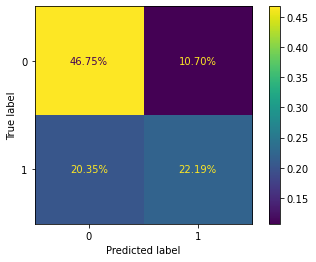

In [ ]:
plot_confusion_matrix(rd2, X_test, y_test, normalize='all', values_format='.2%')  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


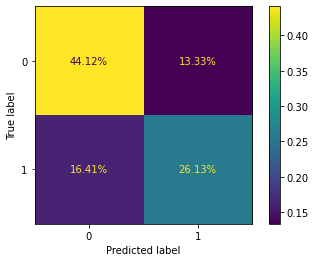

In [ ]:
plot_confusion_matrix(logistc, X_test, y_test, normalize='all', values_format='.2%')  
plt.show()